In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
df = pd.read_csv("data.csv")

In [3]:
df.dropna(inplace=True)

In [4]:
df["TrackNameLen"] = df["Track Name"].apply(len)
df["ArtistLen"] = df["Artist"].apply(len)

In [5]:
# get multiple index
df.set_index(['Date','Position'], inplace = True)

In [6]:
# cross section return all first position
df.xs(1,level="Position").head(2)

,Track Name,Artist,Streams,URL,Region,TrackNameLen,ArtistLen
Date,,,,,,,
2017-01-01,Chantaje,Shakira,253019,https://open.spotify.com/track/6mICuAdrwEjh6Y6...,ar,8,7
2017-01-02,Chantaje,Shakira,185399,https://open.spotify.com/track/6mICuAdrwEjh6Y6...,ar,8,7


In [7]:
# cross section return all on 2017-01-01
df.xs("2017-01-01").head(2)

,Track Name,Artist,Streams,URL,Region,TrackNameLen,ArtistLen
Position,,,,,,,
1,Chantaje,Shakira,253019,https://open.spotify.com/track/6mICuAdrwEjh6Y6...,ar,8,7
2,Vente Pa' Ca,Ricky Martin,223988,https://open.spotify.com/track/7DM4BPaS7uofFul...,ar,12,12


In [8]:
# column - position, rows - date, data - len of song len
song_len = None

for i in xrange(1,4):
    temp = pd.DataFrame(np.array(df.xs(i,level="Position").TrackNameLen), df.xs(i,level="Position").index, [i] )
    if song_len is None:
        song_len = temp
    else:
        song_len = song_len.join(temp)
    print i

1
2
3


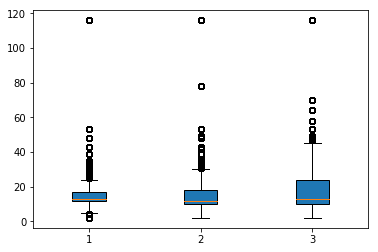

In [17]:
plt.boxplot(np.array(song_len),vert=True,patch_artist=True);   
plt.ylim = (0,20)

In [14]:
np.array(song_len).T

array([[ 8,  8,  8, ...,  8,  8,  8],
       [12, 12, 12, ..., 10, 10, 10],
       [27,  6,  6, ...,  6, 13,  6]])